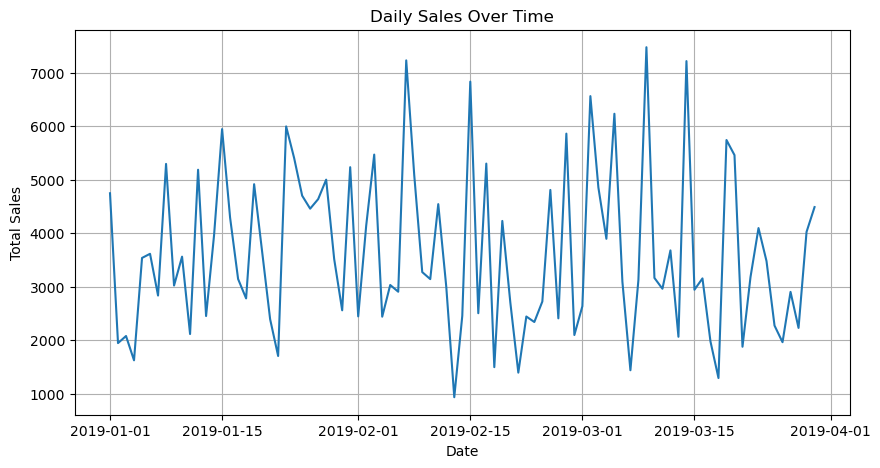

Epoch 1/50


C:\Users\leela\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.2421 - val_loss: 0.1161
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2097 - val_loss: 0.0907
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1717 - val_loss: 0.0674
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1568 - val_loss: 0.0455
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1181 - val_loss: 0.0276
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0869 - val_loss: 0.0215
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0627 - val_loss: 0.0332
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0713 - val_loss: 0.0353
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0685 - val_loss: 0.0267
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0620 - val_loss: 0.0227
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0659 - val_loss: 0.0228
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0630 - val_loss: 0.0227
Epoch 13/50
5/5 ━━━━━━━

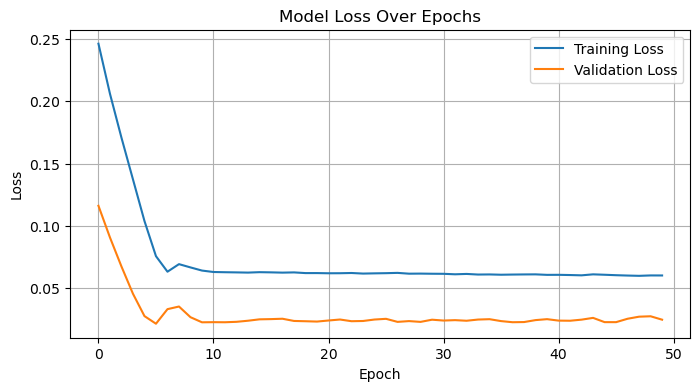

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


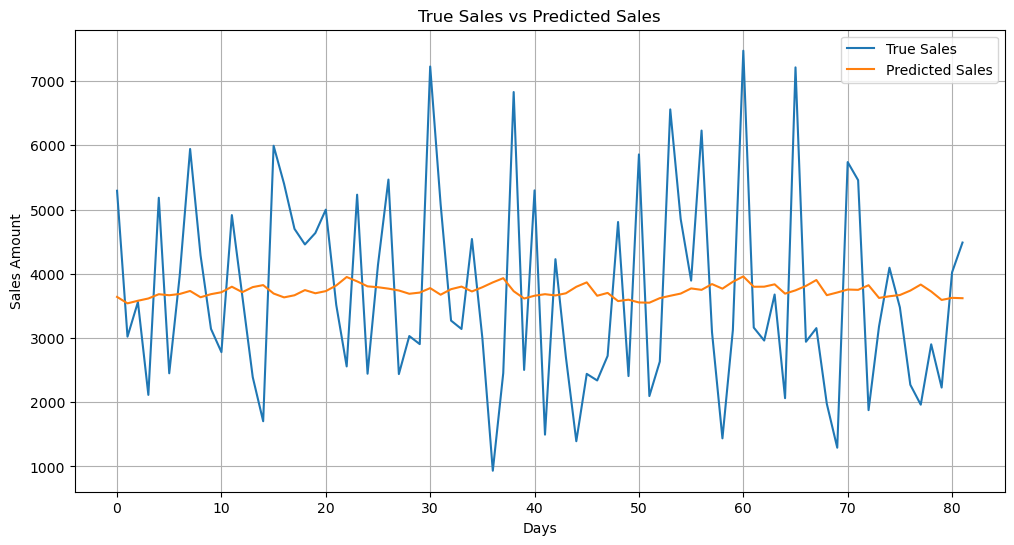

In [1]:
# Step 0: Install requirements if needed
# pip install pandas numpy scikit-learn tensorflow matplotlib

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 2: Load and Prepare Data
file_path = r'C:\Users\leela\OneDrive\Desktop\supermarket_sales - Sheet1.csv'
df = pd.read_csv(file_path)

# Combine Date and Time into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Set Datetime as the index
df.set_index('Datetime', inplace=True)

# Aggregate total sales per day
daily_sales = df['Total'].resample('D').sum()

# Plot the sales
plt.figure(figsize=(10,5))
plt.plot(daily_sales)
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Step 3: Data Preprocessing for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
sales_scaled = scaler.fit_transform(daily_sales.values.reshape(-1, 1))

# Create sequences for LSTM
def create_dataset(series, time_steps=7):
    X, y = [], []
    for i in range(len(series) - time_steps):
        X.append(series[i:i+time_steps])
        y.append(series[i+time_steps])
    return np.array(X), np.array(y)

TIME_STEPS = 7  # 7 days lookback
X, y = create_dataset(sales_scaled, TIME_STEPS)

# Reshape X for LSTM input
X = X.reshape((X.shape[0], X.shape[1], 1))

# Step 4: Build the LSTM Model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(TIME_STEPS, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Step 5: Train the Model
history = model.fit(
    X, y,
    epochs=50,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)

# Step 6: Evaluate the Model
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Make Predictions
predicted = model.predict(X)

# Inverse transform to get actual sales values
predicted_sales = scaler.inverse_transform(predicted)
true_sales = scaler.inverse_transform(y.reshape(-1, 1))

# Step 8: Plot Results
plt.figure(figsize=(12,6))
plt.plot(true_sales, label='True Sales')
plt.plot(predicted_sales, label='Predicted Sales')
plt.title('True Sales vs Predicted Sales')
plt.xlabel('Days')
plt.ylabel('Sales Amount')
plt.legend()
plt.grid(True)
plt.show()
